# Final Project
## Veer Mangat - 12/18/25
## Final Version

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AnimeList_cleaned.csv')
df.head()

,title,type,episodes,rating,score,rank,popularity,members,favorites,premiered,studio,genre
0,Fullmetal Alchemist: Brotherhood,TV,64,R - 17+ (violence & profanity),9.25,1.0,4,1199091,106895,Spring 2009,Bones,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."
1,Kimi no Na wa.,Movie,1,PG-13 - Teens 13 or older,9.19,2.0,33,730076,34912,NaN,CoMix Wave Films,"Drama, Romance"
2,Gintama°,TV,51,R - 17+ (violence & profanity),9.15,3.0,383,198744,5668,Spring 2015,Bandai Namco Pictures,"Action, Comedy, Historical, Sci-Fi, Shounen"
3,Steins;Gate 0,TV,23,PG-13 - Teens 13 or older,9.15,4.0,323,223989,1882,Spring 2018,White Fox,"Sci-Fi, Thriller"
4,Steins;Gate,TV,24,PG-13 - Teens 13 or older,9.14,5.0,8,1010330,92423,Spring 2011,White Fox,"Thriller, Sci-Fi"


## Which anime genres have the highest average user scores?

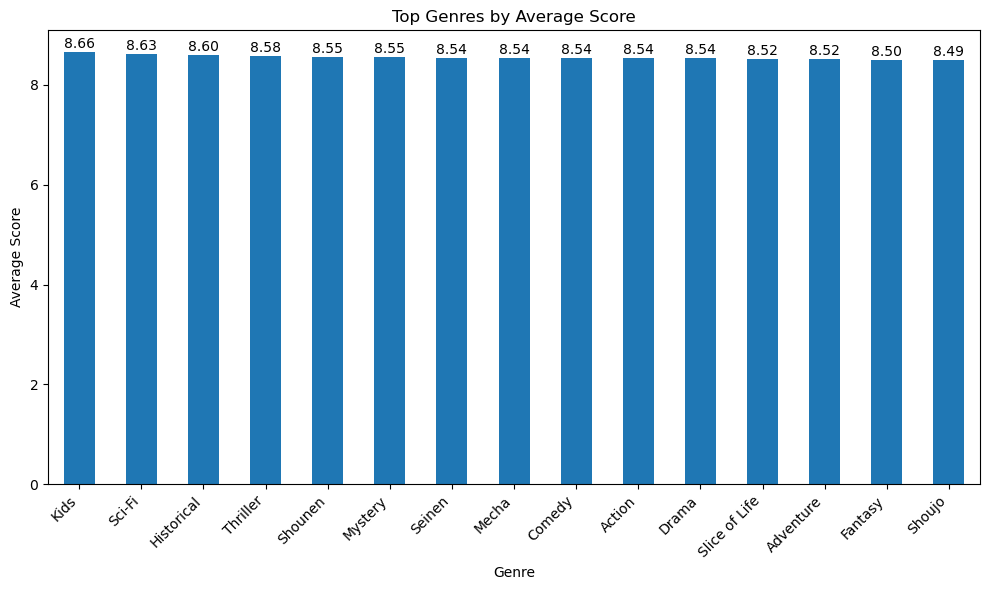

In [3]:

#split multi-genre strings into lists
df['genre_list'] = df['genre'].str.split(', ')

genre_expanded = df.explode('genre_list')

genre_avg = genre_expanded.groupby('genre_list')['score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
#take top 15
ax = genre_avg.head(15).plot(kind='bar')



plt.title('Top Genres by Average Score')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')

#add numbers on top of bars
for i, v in enumerate(genre_avg.head(15)):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Answer:
#### 1. Kids (Pokemon, Yo-Kai Watch!, Wolf Children)
#### 2. Sci-Fi (Akira, Cowboy Bebop, Evangelion, Code Geass)
#### 3. Historical (Blue Eye Samurai, Apothecary Diaries, Vinland Saga, Kingdom)

#### I think the results of this are warranted. The genres present are all extremely relevant in the industry and have critically acclaimed shows linked to them. Along with this, all of the genres are within a .1-.2 gap of one another, showing how it doesn't really matter, as a good show in each genre exists for every person.

## Which studios have produced the most consistent top-rated anime?

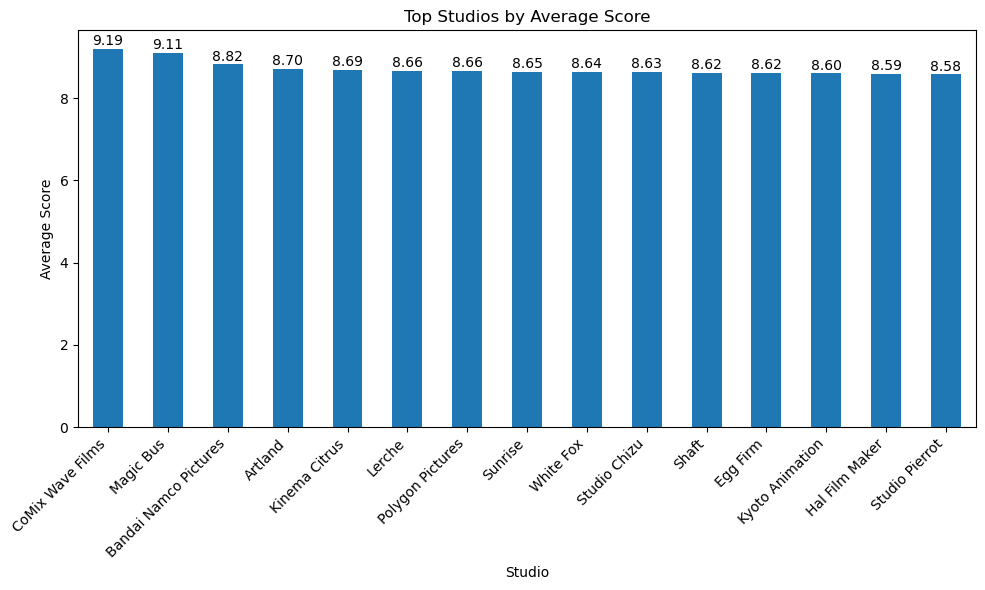

In [4]:
df['studio_list'] = df['studio'].str.split(', ')

#expan so each studio gets its own row
studio_expanded = df.explode('studio_list')

#gr by studio and find average score
studio_avg = studio_expanded.groupby('studio_list')['score'].mean().sort_values(ascending=False)

#take top 15
top_studios = studio_avg.head(15)



plt.figure(figsize=(10,6))
ax = top_studios.plot(kind='bar')

plt.title('Top Studios by Average Score')
plt.xlabel('Studio')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')

#add numbers on top of bars
for i, v in enumerate(top_studios):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Answer:  
#### 1. CoMix Wave Films, responsible for Your Name and Suzume
#### 2. Magic Bus, responsible for Yo-Kai Watch!
#### 3. Bandai Namco Pictures for Gintama and Aikatsu!
#### Other notable studios on this list are Kinema Studios (Made in Abyss and The Rising of the Shield Hero), Lerche (Assassination Classroom and Danganronpa), Sunrise (Cowboy Bebop, the Gundam Franchise, Code Geass), White Fox (Steins;Gate and Re:Zero), Studio Pierrot (Naruto, Yu Yu Hakusho, Great Teacher Onizuka, Black Clover, Tokyo Ghoul, and Kingdom) and Kyoto Animation (A Silent Voice, Violet Evergarden, Clannad).

#### However, I do not agree with this. Several of these studios have either been acquired or dissolved into some other entity, and this data does not reflect accurate standings of the current Japanese animation studio world. Along with this, several of these "studios" are actually production studios or investors that help back these projects, NOT the actual studio creating the project. 


#### Finally, several big names are missing from this list, despite them being indimissiably top players, such as Studio Ghibli (Spirited Away, Howl's Moving Castle, Ponyo, among other great films), Madhouse (Death Note, Hunter x Hunter, One Punch Man), MAPPA (Attack on Titan, Jujutsu Kaisen, Chainsaw Man, Vinland Saga), WIT Studios (Spy x Family, Vinland Saga, Attack on Titan, Moonrise) and Ufotable (Demon Slayer and the Fate/ Series).

#### Although the visualization of this data was engaging, I question its accuracy due to multiple evident flaws that undermine its reliability.

## What is the best season for a show to premiere?

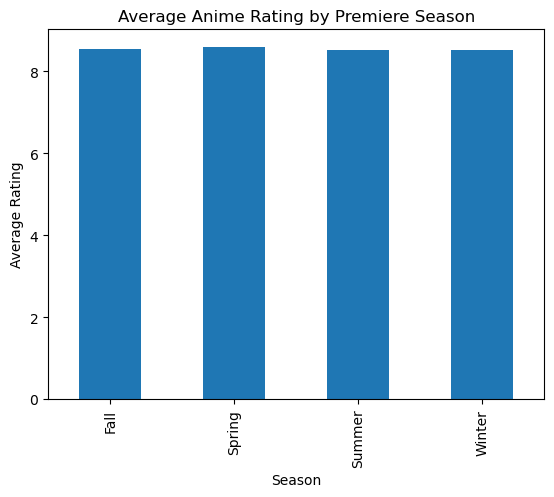

In [7]:
df["season"] = df["premiered"].str.split().str[0]

df.groupby("season")["score"].mean().plot(kind="bar")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Anime Rating by Premiere Season")
plt.show()


### Answer
#### Average anime ratings are very similar across all the seasons, with only a slight difference. This suggests that the season an anime airs does not significantly impact its rating.

## What relationship exists between the number of episodes in a TV series and its overall rating?

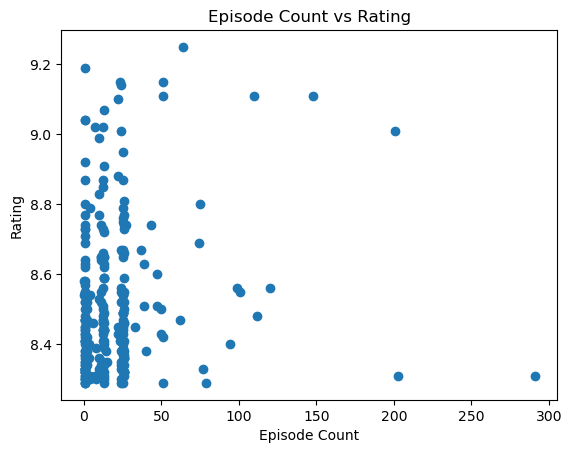

In [9]:
plt.scatter(df["episodes"], df["score"])
plt.xlabel("Episode Count")
plt.ylabel("Rating")
plt.title("Episode Count vs Rating")
plt.show()

### Answer:  
#### There is no clear relationship between the count of episodes in an Anime and its overall rating. At the lower episode counts, the ratings are all scattered across them. At the higher episode counts, there is no consistenc›y. This suggests that the quality is not dependent on length.